# Demostración del funcionamiento de los scripts

### Velmaps.py and Modelos_sint.py

## Creación del fit a partir de datos con Velmaps.py

In [1]:
import Velmaps as vm

In [2]:
help(vm)

Help on module Velmaps:

NAME
    Velmaps - Scientific Data Analysis of Galaxy Velocity Maps

DESCRIPTION
    This code constructs a galaxy model from its experimental velocity map.
    
    Authors:
            José Miguel Ladino (CORREO), Universidad Nacional de Colombia
            Omar Asto Rojas (CORREO), Uiversidad Nacional de Ingenería, Perú
            Jennifer Grisales <jennifer.grisales@saber.uis.edu.co>, Universidad Industrial de Santander, Colombia
    Please contact us in case of questions or bugs.
    
    Supervisor:
            PhD. Juan Carlos Basto Pineda
    
    This code is the core of the Data Analysis final course project inside LA-CoNGA Physics program
    2021
    
    Please import the following libraries:
    
    import numpy as np
    import matplotlib as mt
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from scipy.optimize import leastsq
    import scipy.stats as stats
    from astropy.io import fits
    import scipy.op

In [3]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import leastsq
import scipy.stats as stats
from astropy.io import fits
import scipy.optimize as optimize
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sb
from mpl_toolkits.axes_grid1 import make_axes_locatable


## Cálculo del mapa de velocidad

In [4]:
help(vm.Modelo_Vlos)

Help on function Modelo_Vlos in module Velmaps:

Modelo_Vlos(xx, yy, p)
            Compute the Velocity map in the line of observation of a galaxy data.
            Returns a 2D array with the velocity values.
            
            Parameters
            ----------
            xx : array_like
                 array contain the x grid of a 2D map grid.
            yy : array_like
                 array contain the y grid of a 2D map grid.
            p : array_like
                Physical parameters the observated galaxy
                example: 
                    p = [x0, y0, v_sys, i, phi_0, V_t, R_0, a, g]
                    where,
                        x0 : x coordinate of the galaxy center
                        y0 : y coordinate of the galaxy center
                        v_sys : velocity of the galaxy center
                        i : zenith angle of inclination in the galaxy
                        phi_0 : Angle for the projected disk
                        V_t : T

In [5]:
x = np.arange(0,160)
y = np.arange(0,160)
Y, X = np.meshgrid(x,y)
p = [80,80,5,30,-90,350,10,0.9,1.1] 

vm.Modelo_Vlos(X , Y, p)

array([[-60.7608684 , -61.29696927, -61.83803491, ..., -61.40735191,
        -60.87079085, -60.33920029],
       [-60.33920029, -60.87756071, -61.42103646, ..., -60.98834256,
        -60.44950092, -59.91577634],
       [-59.90897596, -60.44950092, -60.99529317, ..., -60.56066237,
        -60.01963493, -59.48387231],
       ...,
       [ 69.47006302,  70.01265244,  70.56066237, ...,  70.12417289,
         69.58105954,  69.04335984],
       [ 69.90897596,  70.44950092,  70.99529317, ...,  70.56066237,
         70.01963493,  69.48387231],
       [ 70.33920029,  70.87756071,  71.42103646, ...,  70.98834256,
         70.44950092,  69.91577634]])

## Cálculo del fit por mínimos cuadrados
Esta función aplica para archivos simulados .txt como datos reales .fits, leer el help del script

In [6]:
help(vm.fit_vel)

Help on function fit_vel in module Velmaps:

fit_vel(file_dir, typef_bool, X, Y, p, boolean)
                This function implements the least squares method, to minimise the discrepancies
                between the velocity values of each pixel between the real or synthetic velocity
                map and the model velocity map. The function to be used is  extit{leastsq} of 
                Scipy, which will be applied to the function -error- defined between the difference
                of velocity values of the real or synthetic data and the model, to determine the 
                values of the 9 model parameters that best fit the real or synthetic velocity map.
    
        
                How to use me?: 
                            1) Type your y and x vectors and you matrix before:
                                x = np.arange(0,160)
                                y = np.arange(0,160)
                                Y, X = np.meshgrid(x,y)
                            2) D

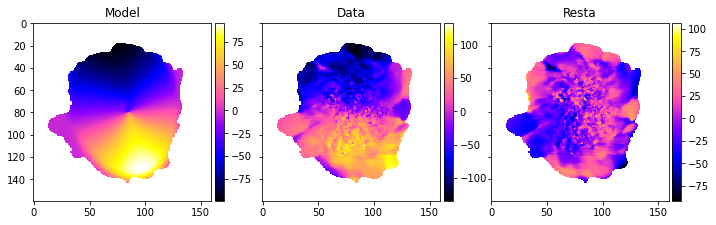

array([[-1.82462809, -1.82463479, -1.82464321, ..., -1.82460286,
        -1.8246026 , -1.82460239],
       [-1.82463082, -1.82463829, -1.8246477 , ..., -1.82460301,
        -1.82460271, -1.82460248],
       [-1.82463379, -1.82464211, -1.82465261, ..., -1.82460318,
        -1.82460285, -1.82460258],
       ...,
       [-1.82460148, -1.82460146, -1.82460143, ..., -1.8245817 ,
        -1.82458554, -1.82458864],
       [-1.82460149, -1.82460147, -1.82460145, ..., -1.82458367,
        -1.8245871 , -1.82458987],
       [-1.82460149, -1.82460148, -1.82460146, ..., -1.82458546,
        -1.82458852, -1.824591  ]])

In [4]:
vm.fit_vel("velmap.txt",False,X,Y,p,False)

### Para datos reales (.fits)


/home/jennifer/Documentos/Maestría/Semestre_2/data_science/op8_scientific_data_analysis_of_galaxy_velocity_maps/op8_scientific_data_analysis_of_galaxy_velocity_maps/Velmaps.py:98: RuntimeWarning: invalid value encountered in power
  v_c = p[5] * ((r/p[6])**(p[7]))/(1 + (r/p[6])**(p[8]))


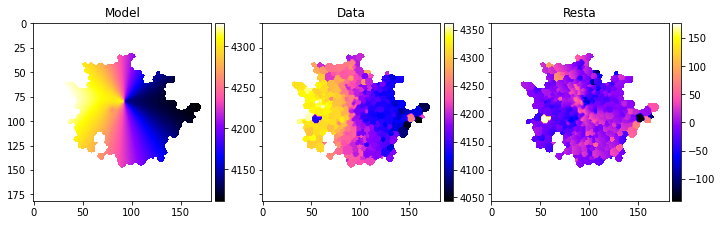

array([[4315.5883337 , 4315.05336689, 4314.51164037, ..., 4138.64430206,
        4138.05839906, 4137.48017045],
       [4315.99874113, 4315.46620132, 4314.92687574, ..., 4138.18049299,
        4137.59702212, 4137.02127086],
       [4316.41032306, 4315.88029639, 4315.34345984, ..., 4137.71430917,
        4137.13338127, 4136.56021616],
       ...,
       [4306.14396941, 4305.57227162, 4304.99478887, ..., 4147.7286642 ,
        4147.11343321, 4146.50461328],
       [4305.77690577, 4305.20456543, 4304.62649039, ..., 4148.12819824,
        4147.51251713, 4146.90318093],
       [4305.41204016, 4304.83911225, 4304.26050011, ..., 4148.52468262,
        4147.90861702, 4147.29883014]])

In [5]:

vm.fit_vel("ugc4555_rv_voro.fits",True,X,Y,p,False)
#vm.fit_vel("velmap.txt",False,X,Y,p,False)

## Optimización del fit usando la matriz de covarianza

In [7]:
help(vm.fit_cov)

Help on function fit_cov in module Velmaps:

fit_cov(file_dir, typef_bool, X, Y, variance, n)
                This function performs an optimisation of the parameter values that can
                be found by the     extit{leastsq} function, making use of the covariance
                matrix $Cov$ with which an estimate of the variance $Var$ can be calculated
                for each parameter among the data analysed in the error function, as follows:
                
                         Var = Tr(Cov) (rac{z_{fit}-z}{n-p})
                         
                where $Tr(Cov)$ is the sum of the elements of the diagonal of the covariance
                matrix of each parameter, $z_{fit}$ is the velocity values using the fitted
                parameters, $z$ is the velocity values of the real or synthetic data set
                to be analysed, $n$ is the number of data in $z$ and $p$ is the number of
                parameters to be fitted.  
        
                Param

In [4]:
fit_cov = vm.fit_cov('velmap.txt',False, X, Y, 100, 10)

/home/jennifer/Documentos/Maestría/Semestre_2/data_science/op8_scientific_data_analysis_of_galaxy_velocity_maps/op8_scientific_data_analysis_of_galaxy_velocity_maps/Velmaps.py:98: RuntimeWarning: divide by zero encountered in power
  v_c = p[5] * ((r/p[6])**(p[7]))/(1 + (r/p[6])**(p[8]))
/home/jennifer/Documentos/Maestría/Semestre_2/data_science/op8_scientific_data_analysis_of_galaxy_velocity_maps/op8_scientific_data_analysis_of_galaxy_velocity_maps/Velmaps.py:98: RuntimeWarning: invalid value encountered in power
  v_c = p[5] * ((r/p[6])**(p[7]))/(1 + (r/p[6])**(p[8]))
/home/jennifer/Documentos/Maestría/Semestre_2/data_science/op8_scientific_data_analysis_of_galaxy_velocity_maps/op8_scientific_data_analysis_of_galaxy_velocity_maps/Velmaps.py:98: RuntimeWarning: invalid value encountered in true_divide
  v_c = p[5] * ((r/p[6])**(p[7]))/(1 + (r/p[6])**(p[8]))
/home/jennifer/Documentos/Maestría/Semestre_2/data_science/op8_scientific_data_analysis_of_galaxy_velocity_maps/op8_scientific_da

## Cálculo de los parámetros ajustados con la matriz de covarianza

In [8]:
help(vm.fit_tuplas)

Help on function fit_tuplas in module Velmaps:

fit_tuplas(file_dir, typef_bool, X, Y, variance, n, boolean)
                This function compute que velocity map from the bestparams in fit_cov function
        
                Parameters
                ----------
                file_dir : string
                     string with the name of file (txt or fits) type in quotes 
                typef_bool : boolean
                     Type True if your file is -fits- and False if is -txt-
                x : array_like
                     array contain the x grid of a 2D map grid.
                y : array_like
                     array contain the y grid of a 2D map grid.
                variance : integer
                    integer with a variance value
                n : integer
                    times for compute the covariance
                boolean : boolean
                     True for plot the residual distribution (histogram)
    
                Returns
              

/home/jennifer/Documentos/Maestría/Semestre_2/data_science/op8_scientific_data_analysis_of_galaxy_velocity_maps/op8_scientific_data_analysis_of_galaxy_velocity_maps/Velmaps.py:345: RuntimeWarning: overflow encountered in square
  Res= (R1-R2)**2 / (len(Z)-9)**2


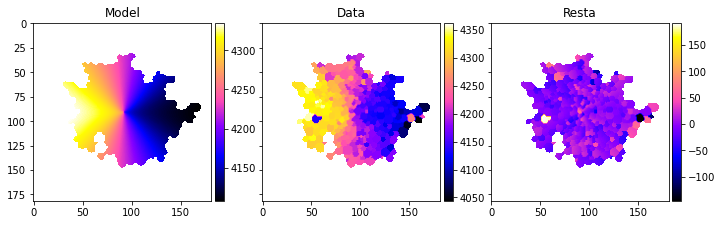

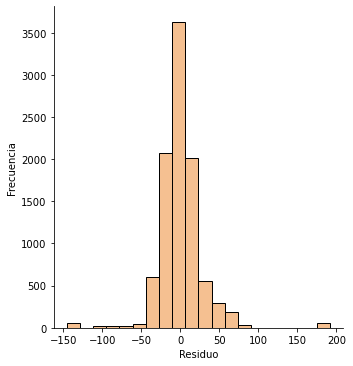

173448.9233098185


In [5]:
tuplas = vm.fit_tuplas('ugc4555_rv_voro.fits',True, X, Y, 1000, 10,True)

# Análisis del modelo a través de modelos sintéticos

In [1]:
import Modelos_sint as sint

El análisis del modelo a través de modelos sintéticos se da en los siguientes pasos:

## Obtención de parámetros cinéticos reales

Los parámetros cinéticos fueron sacados del paper "Kinematic Modelling of disc galaxies using graphics processing units" de G. Bekiaris.

Los parámetros se pusieron en un archivo csv, para su análisis se procede a convertirlos en un arrar y completar los parámetros faltantes tomando en cuenta los límites de los datos obtenidos de una tabla del mismo parper:

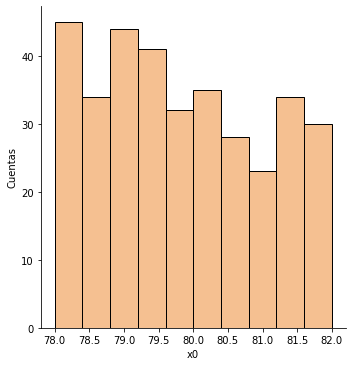

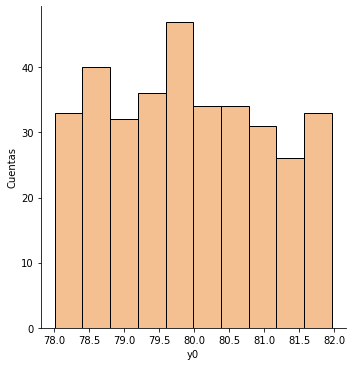

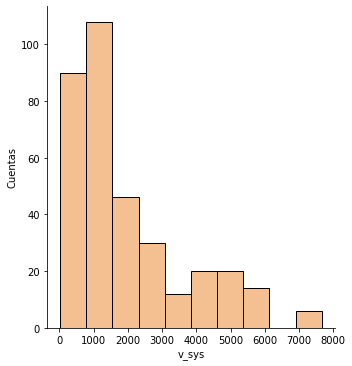

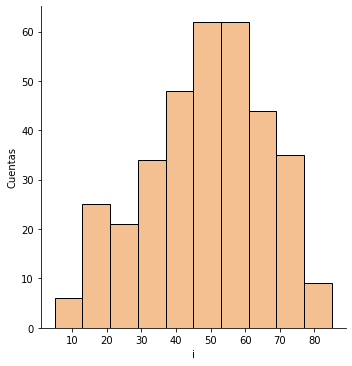

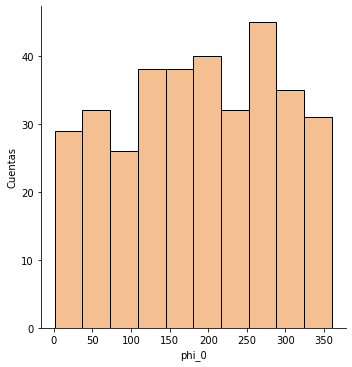

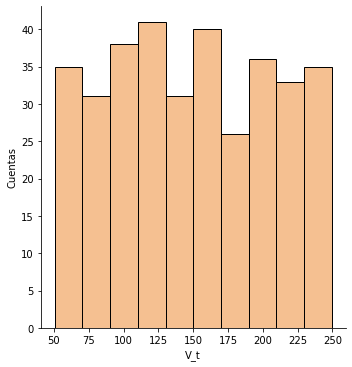

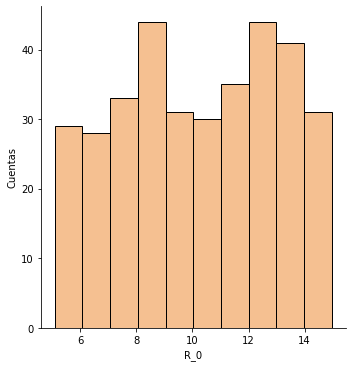

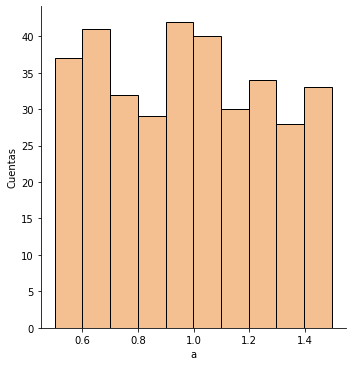

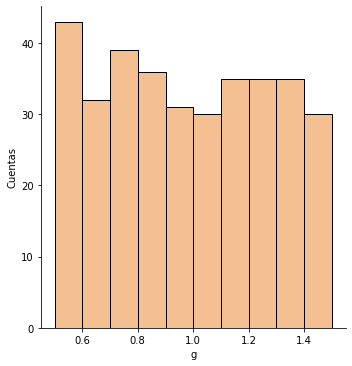

In [2]:
##Para la función se entrega la ruta donde están los parámetros, estos datos están puestos en formato .csv:
Parametros_cineticos = sint.Parametros_("../op8_scientific_data_analysis_of_galaxy_velocity_maps/datos_fabry_GHASP/")

El resultado de esta función aparte de generar el array de parámetros cinéticos, genera un histograma de cada parámetro.

## Obtención de mejores parámetros

El problema que se encontró en dicho array es que los paŕametros que se completaron, no nocesariamente son apegados a la realidad, que es muy importante en el análisis a través de modelos sintéticos.  
Para solucionar este problema, se procedió a ajustar los parámetros a galaxias obtenidas la base de datos [Fabry Perot Website](https://cesam.lam.fr/fabryperot/) en donde se pueden obtener matrices de velocidad de diferentes galaxias. Para el análisis se busco las galaxias pertenecientes al Catálogo General Uppsala (UGC, por sus siglas en inglés) y que se hayan estudiado en el paper referido para la obteción de parámetros cinéticos.

In [3]:
##Para la función se entrega la ruta donde están los parámetros, estos datos están puestos en formato .fits:
#matriz_de_velocidades_reales = sint.Galaxies("../op8_scientific_data_analysis_of_galaxy_velocity_maps/datos_fabry_GHASP/")

In [4]:
##Ahora se procede a obtener los parámetros ajustados
## Se recomienda trabajar con los parámetros cargados, debido al tiempo de computación
#Parametros_ajustados_reales = sint.Params_ajus(matriz_de_velocidades_reales,Parametros_cargados)

In [5]:
##Debido a que el cálculo puede demorar un poco, se puede cargar los siguientes datos para seguir analizando
import numpy as np
Parametros_cargados = np.load("../op8_scientific_data_analysis_of_galaxy_velocity_maps/datos_fabry_GHASP/sample.npy")

## Generación de 1000 modelos sintéticos a partir de la muestra de datos reales

Para la generación de 1000 parámetros sintéticos, es decir, obtenidos a partir de parámetros reales se utiliza la siguiente función: 

In [6]:
Parametros_sinteticos = sint.choice(Parametros_cargados, 1000)

Una vez que se generaron los parámetros se proceden a generar con estos los 1000 modelos sintéticos:

In [7]:
Modelos_sinte = sint.mode_sinte(Parametros_sinteticos)

/home/astoo/Tareas_LC/op8_scientific_data_analysis_of_galaxy_velocity_maps/Modelos_sint.py:233: RuntimeWarning: overflow encountered in power
  v_c = p[5] * ((r/p[6])**(p[7]))/(1 + (r/p[6])**(p[8]))
/home/astoo/Tareas_LC/op8_scientific_data_analysis_of_galaxy_velocity_maps/Modelos_sint.py:233: RuntimeWarning: overflow encountered in multiply
  v_c = p[5] * ((r/p[6])**(p[7]))/(1 + (r/p[6])**(p[8]))
/home/astoo/Tareas_LC/op8_scientific_data_analysis_of_galaxy_velocity_maps/Modelos_sint.py:233: RuntimeWarning: invalid value encountered in true_divide
  v_c = p[5] * ((r/p[6])**(p[7]))/(1 + (r/p[6])**(p[8]))


## Generación de una muestra de error a partir de los datos reales

Todos los datos reales obtenidos de [Fabry Perot Website](https://cesam.lam.fr/fabryperot/) se ajustan con la función de Epinat estudiada en la primera parte, para obtener una muestra de restos con la siguiente función:


In [8]:
##Se recomienda trabajar con los datos de errores.py por el tiempo que puede tomar el cáculo
#Muestra_de_errores = sint.Error_muestra(matriz_de_velocidades_reales)

In [9]:
##Debido a que el código demora, se cargo los datos errores.py
errores_cargados = np.load("../op8_scientific_data_analysis_of_galaxy_velocity_maps/datos_fabry_GHASP/errores.npy")

## Determinación de la incertidumbre de parámetros a través de la generación de modelos sintéticos

Una vez obtenida la muestra de restos y los modelos sintéticos se procede a tomar un modelo sintético y sumarle un error de la muestra de errores para obtener un modelo perturbado. Una vez obtenido el modelo perturbado se ajusta con la función de Epinat estudiada, los nuevos parámetros ajustados se igualan con los parámetros del modelo sintético sin perturbar. Se nota que si hay una diferencia es debido a la suma del resto, hay veces que se obtiene los mismos valores de parámetros y es porque hay restos que son muy pequeños. Todas las diferencias de parámetros obtenidas se suman y se dividen entre el total de las veces que los restos característicos fueron tomados, para así obtener una incertidumbre global relacionada a los generación de modelos sintéticos obtenidos a partir de datos reales.

In [ ]:
Incertidumbre_de_parámetros = sint.parametros_incer(Modelos_sinte, errores_cargados, 10)

/home/astoo/Tareas_LC/op8_scientific_data_analysis_of_galaxy_velocity_maps/Modelos_sint.py:71: RuntimeWarning: invalid value encountered in power
  v_c = p[5] * ((r/p[6])**(p[7]))/(1 + (r/p[6])**(p[8]))


In [ ]:
Incertidumbre_de_parámetros